In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/suhan/Desktop/SEM VII/Fin Econ/final_dataset_quarterly.csv")

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()

Dataset Head:
          Date  S&P500_Adj_Close  S&P500_Close  S&P500_High   S&P500_Low  \
0  2000-09-30       1475.978888   1475.978888  1485.611268  1467.169687   
1  2000-12-31       1366.310312   1366.310312  1381.009047  1353.282070   
2  2001-03-31       1273.329039   1273.329039  1285.768391  1260.875803   
3  2001-06-30       1234.250314   1234.250314  1243.688573  1222.726347   
4  2001-09-30       1153.706613   1153.706613  1164.702715  1144.440006   

   S&P500_Open  S&P500_Volume  VIX_Daily_Returns  VIX_Adj_Close  VIX_Close  \
0  1476.266030   6.029110e+10          -0.000161      19.169048  19.169048   
1  1368.190949   7.009450e+10          -0.001227      26.016667  26.016667   
2  1275.914846   7.728081e+10          -0.001965      25.726452  25.726452   
3  1233.284598   7.468392e+10           0.000943      23.923810  23.923810   
4  1156.816783   7.217820e+10          -0.002646      25.380339  25.380339   

   ...   VIX_Open  VIX_Volume  VIX_Daily_Returns.1  USD_EUR_Excha

In [ ]:
# Add columns for S&P_return, S&P_return squared and Percentage change in VIX Close
data['S&P_return'] = data['S&P500_Close'].pct_change()
data['S&P_return_squared'] = data['S&P_return'] ** 2
data['VIX_pct_change'] = data['VIX_Close'].pct_change()

In [4]:
# choose only some columns 
# data = df[['Date', 'S&P500_Adj_Close','S&P500_Volume','VIX_Daily_Returns','VIX_Adj_Close','USD_EUR_Exchange_Rate','Effective_Federal_Funds_Rate','US_Dollar_Index','CPI_All_Items','Consumer_Sentiment_Index','Unemployment_Rate','GDP']]
data['GDP'] = np.log(data['GDP'])

In [5]:
# Summary statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        S&P500_Adj_Close  S&P500_Close  S&P500_High   S&P500_Low  S&P500_Open  \
count         94.000000     94.000000    94.000000    94.000000    94.000000   
mean        1984.823453   1984.823453  1996.148144  1972.072357  1984.533872   
std         1072.314500   1072.314500  1077.762969  1066.131093  1072.041772   
min          807.665901    807.665901   820.841145   794.834589   808.660491   
25%         1195.107306   1195.107306  1200.428518  1189.717909  1195.080870   
50%         1482.721191   1482.721191  1492.646348  1472.560874  1482.654839   
75%         2675.014450   2675.014450  2688.870691  2656.405753  2678.455275   
max         4602.108894   4602.108894  4623.372498  4576.220802  4597.917496   

       S&P500_Volume  VIX_Daily_Returns  VIX_Adj_Close  VIX_Close   VIX_High  \
count   9.400000e+01          94.000000      94.000000  94.000000  94.000000   
mean    2.122213e+11           0.000273      19.966314  19.966314  21.004077   
std     8.327838e

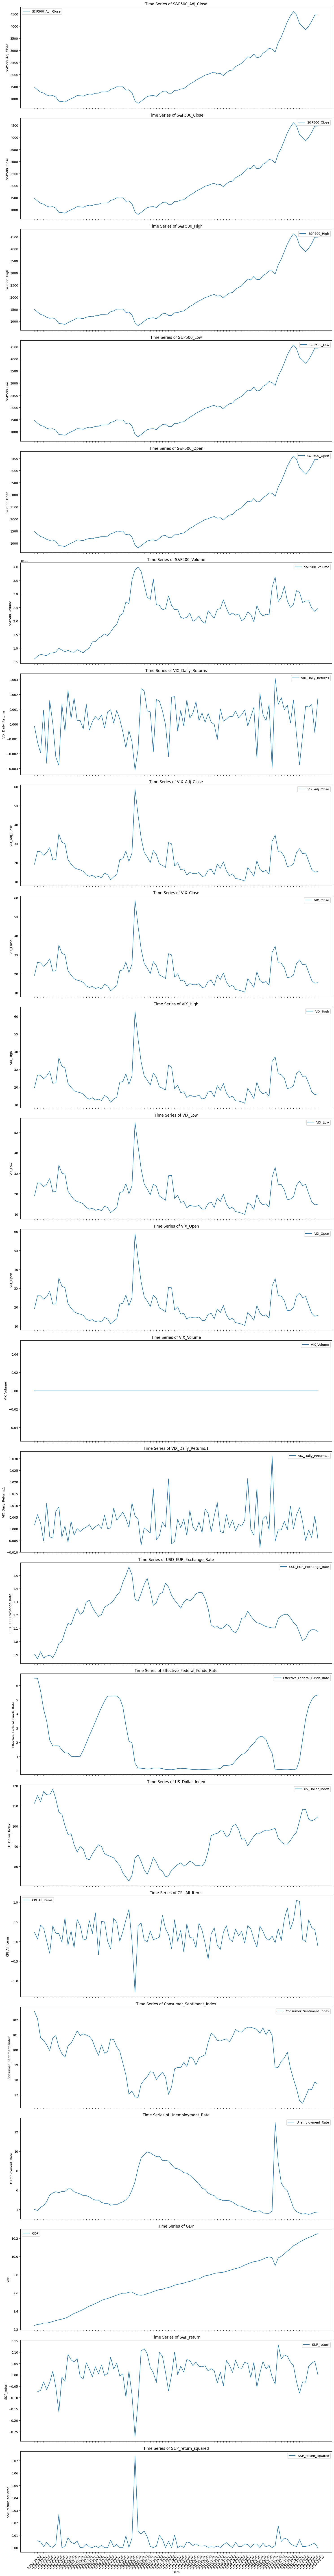

In [6]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(15, 5 * num_columns), sharex=True)

for i, column in enumerate(numeric_columns):
    ax = axes[i] if num_columns > 1 else axes
    ax.plot(data['Date'], data[column], label=column)
    ax.set_title(f'Time Series of {column}')
    ax.set_ylabel(column)
    ax.legend()

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

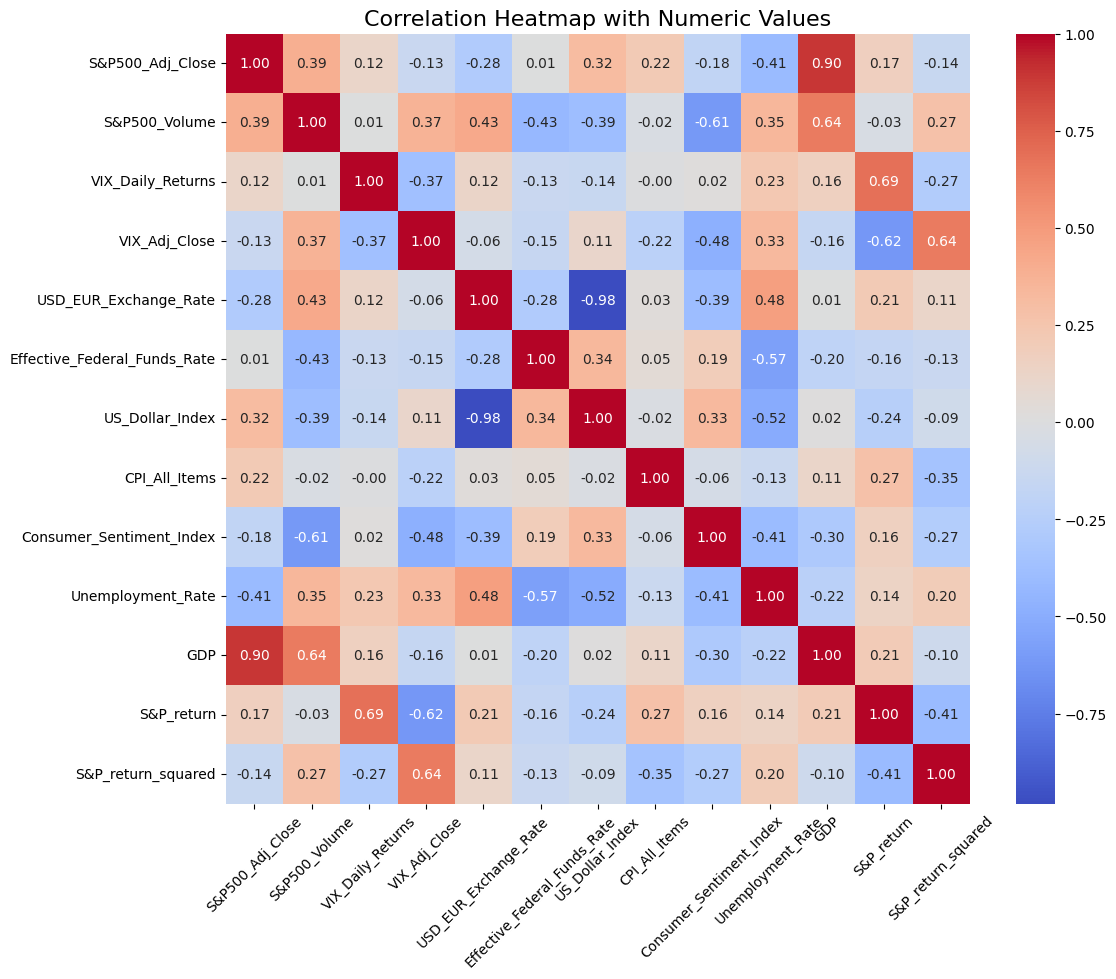

In [ ]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Correlation Heatmap
# Focus on key macroeconomic columns for correlation analysis
key_columns = [
    'S&P500_Adj_Close','S&P500_Volume','VIX_Daily_Returns','VIX_Adj_Close','USD_EUR_Exchange_Rate',
    'Effective_Federal_Funds_Rate','US_Dollar_Index','CPI_All_Items','Consumer_Sentiment_Index','Unemployment_Rate','GDP',
    'S&P_return', 'S&P_return_squared'
]

# Ensure there are no non-numeric columns or NaN values
correlation_matrix = data[key_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

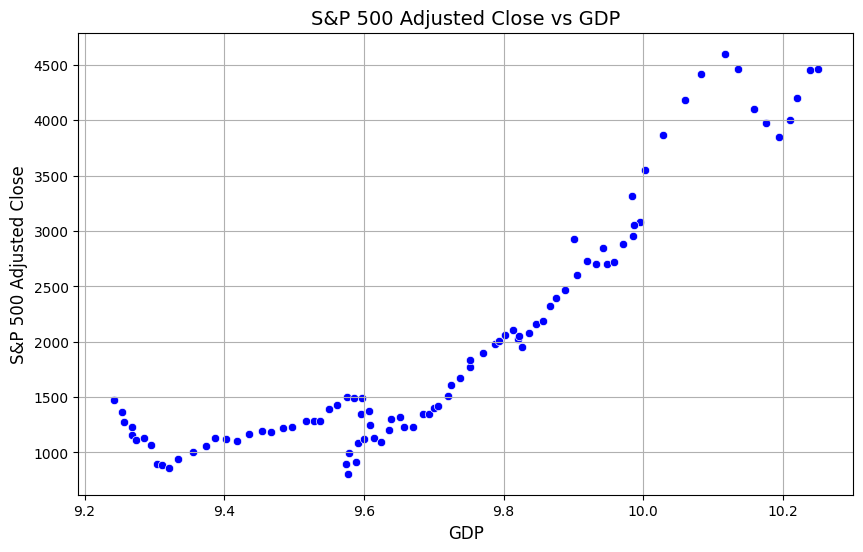

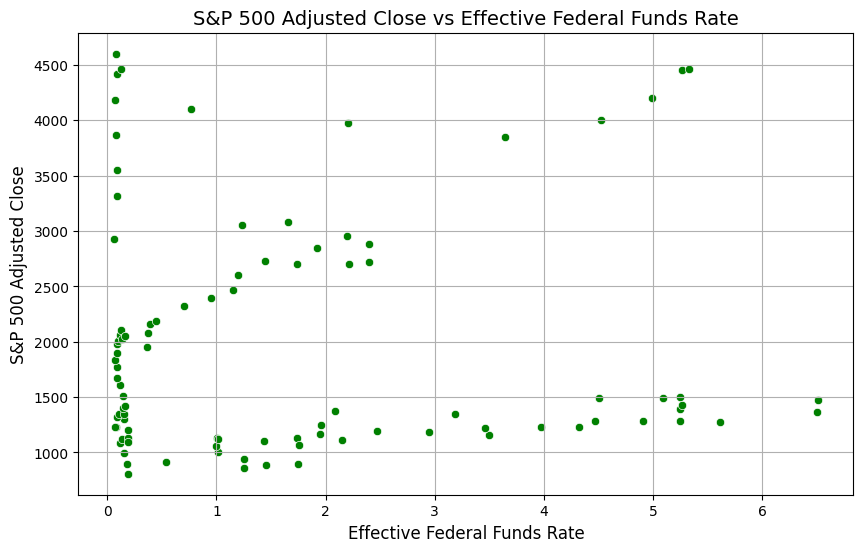

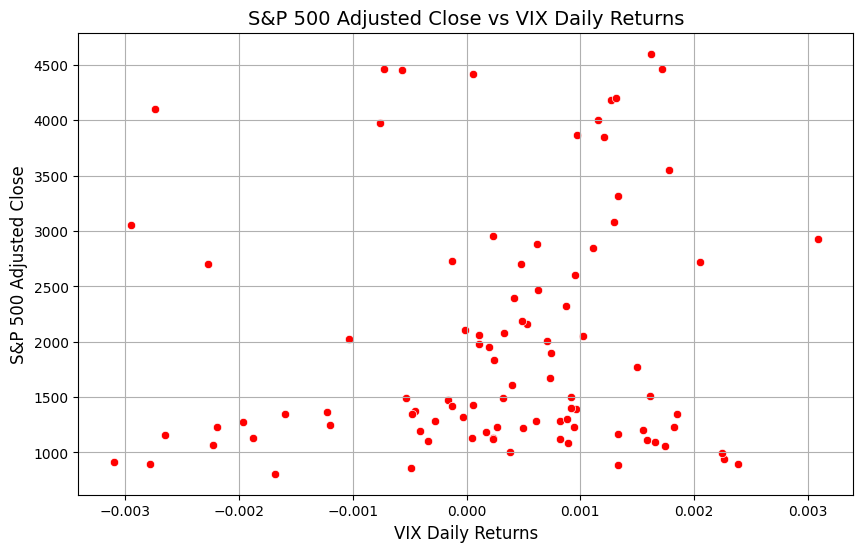

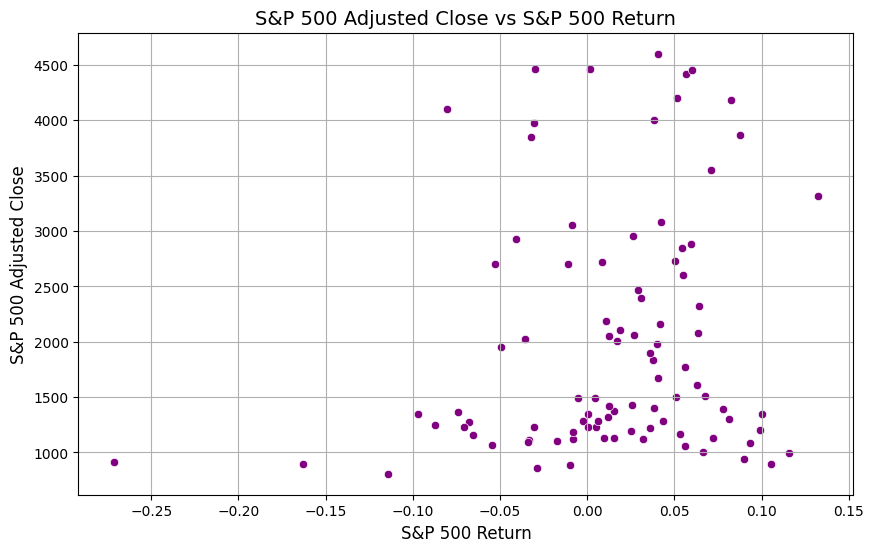

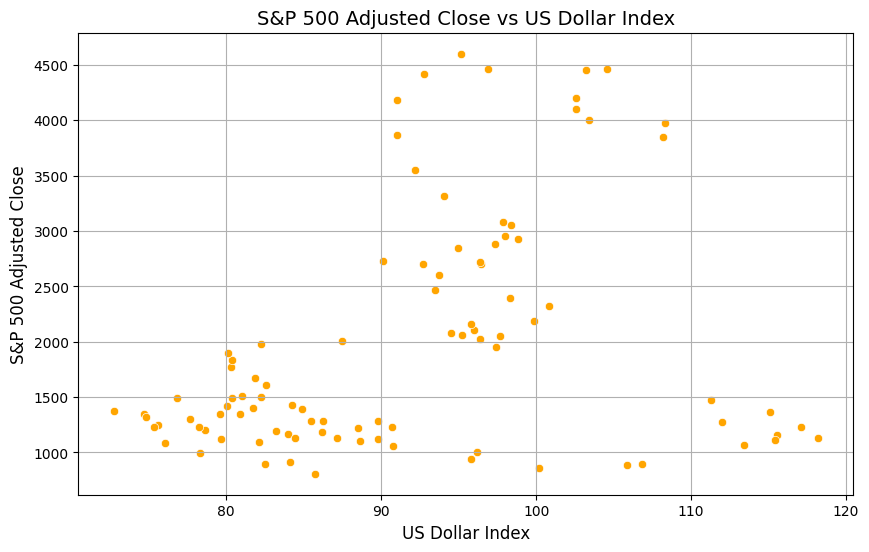

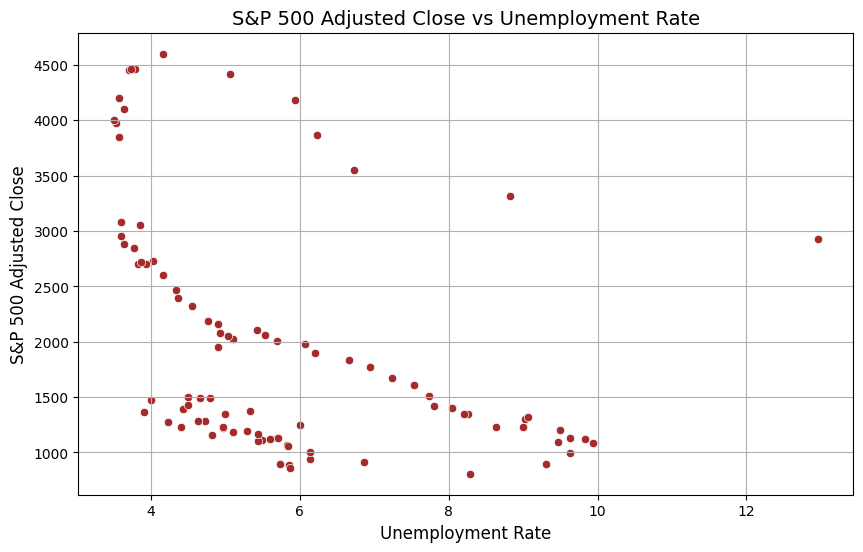

In [ ]:
# Scatter plot for S&P 500 Adjusted Close vs log(GDP)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP', y='S&P500_Adj_Close', color='blue')
plt.title('S&P 500 Adjusted Close vs log(GDP)', fontsize=14)
plt.xlabel('log(GDP)', fontsize=12)
plt.ylabel('S&P 500 Adjusted Close', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for S&P 500 Adjusted Close vs Effective Federal Funds Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Effective_Federal_Funds_Rate', y='S&P500_Adj_Close', color='green')
plt.title('S&P 500 Adjusted Close vs Effective Federal Funds Rate', fontsize=14)
plt.xlabel('Effective Federal Funds Rate', fontsize=12)
plt.ylabel('S&P 500 Adjusted Close', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for S&P 500 Adjusted Close vs percent change in VIX 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='VIX_Daily_Returns', y='S&P500_Adj_Close', color='red')
plt.title('S&P 500 Adjusted Close vs VIX Daily Returns', fontsize=14)
plt.xlabel('VIX Daily Returns', fontsize=12)
plt.ylabel('S&P 500 Adjusted Close', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for S&P 500 Adjusted Close vs S&P 500_return
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='S&P_return', y='S&P500_Adj_Close', color='purple')
plt.title('S&P 500 Adjusted Close vs S&P 500 Return', fontsize=14)
plt.xlabel('S&P 500 Return', fontsize=12)
plt.ylabel('S&P 500 Adjusted Close', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for S&P 500 Adjusted Close vs USD index
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='US_Dollar_Index', y='S&P500_Adj_Close', color='orange')
plt.title('S&P 500 Adjusted Close vs US Dollar Index', fontsize=14)
plt.xlabel('US Dollar Index', fontsize=12)
plt.ylabel('S&P 500 Adjusted Close', fontsize=12)
plt.grid(True)
plt.show()

# Scatter plot for S&P 500 Adjusted Close vs unemployment rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unemployment_Rate', y='S&P500_Adj_Close', color='brown')
plt.title('S&P 500 Adjusted Close vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=12)
plt.ylabel('S&P 500 Adjusted Close', fontsize=12)
plt.grid(True)
plt.show()


<Figure size 1400x600 with 0 Axes>

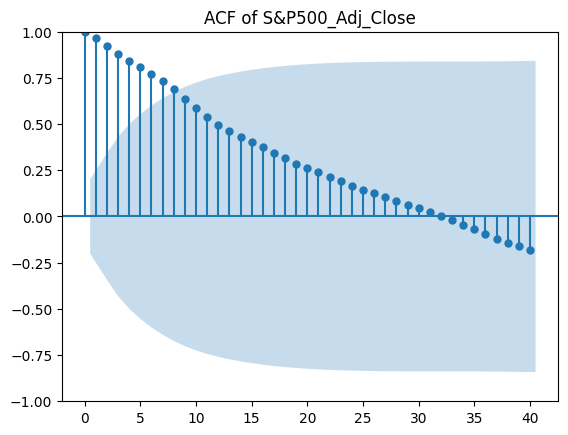

<Figure size 1400x600 with 0 Axes>

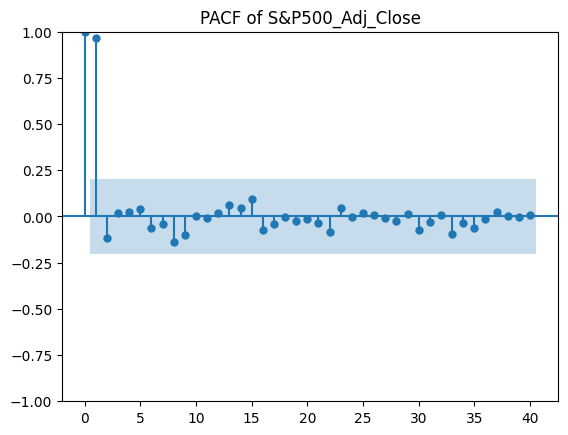


ADF Test Results:
ADF Statistic: 1.2978861290135855
p-value: 0.9965970739742259
Critical Values:
   1%: -3.506057133647011
   5%: -2.8946066061911946
   10%: -2.5844100201994697


<Figure size 1400x600 with 0 Axes>

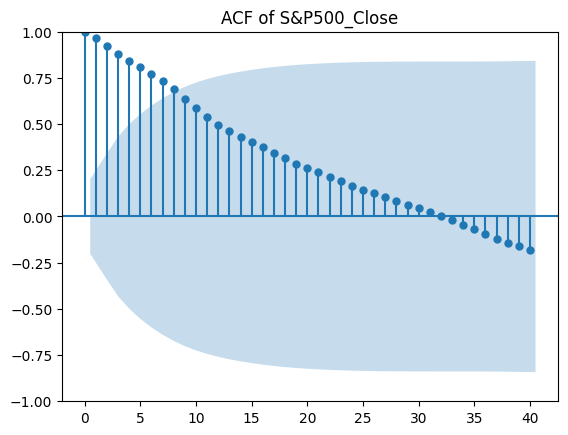

<Figure size 1400x600 with 0 Axes>

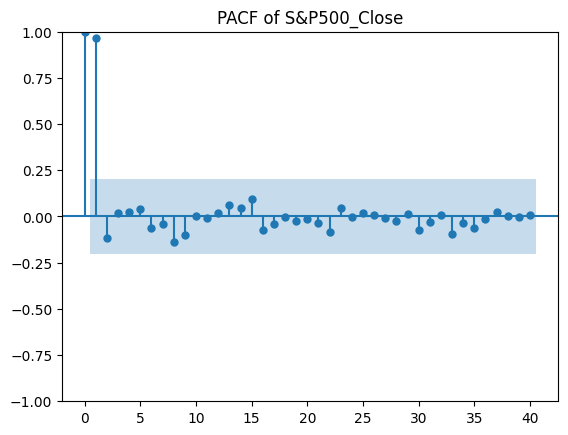


ADF Test Results:
ADF Statistic: 1.2978861290135855
p-value: 0.9965970739742259
Critical Values:
   1%: -3.506057133647011
   5%: -2.8946066061911946
   10%: -2.5844100201994697


<Figure size 1400x600 with 0 Axes>

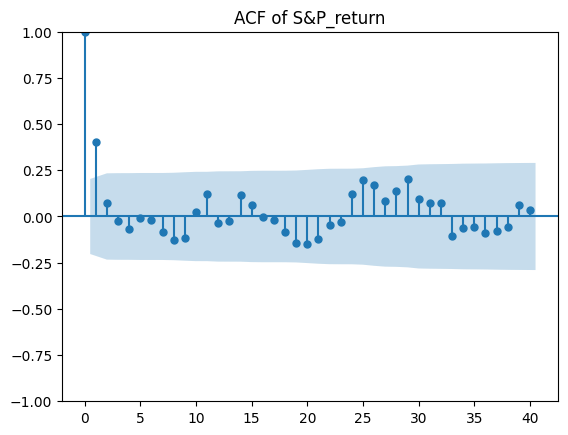

<Figure size 1400x600 with 0 Axes>

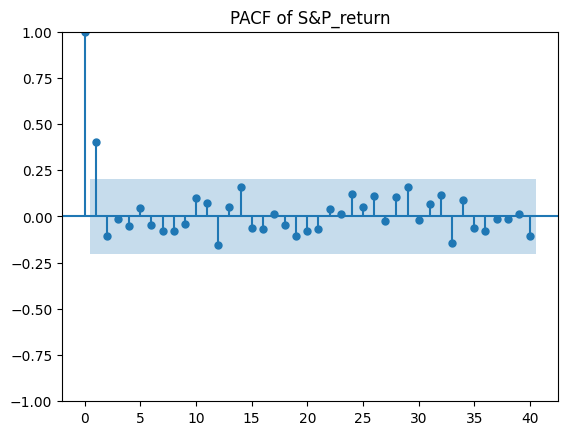


ADF Test Results:
ADF Statistic: -5.868379817593731
p-value: 3.2842502593968796e-07
Critical Values:
   1%: -3.50434289821397
   5%: -2.8938659630479413
   10%: -2.5840147047458037


<Figure size 1400x600 with 0 Axes>

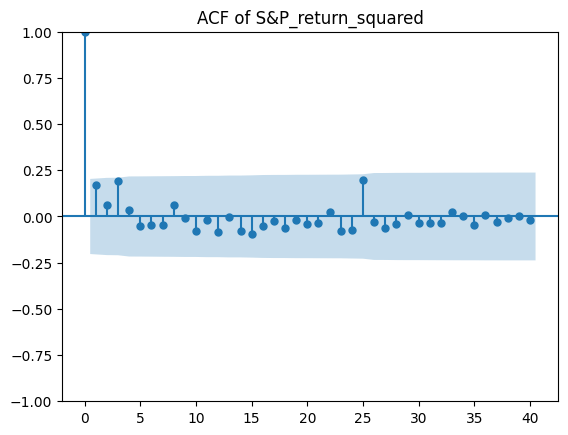

<Figure size 1400x600 with 0 Axes>

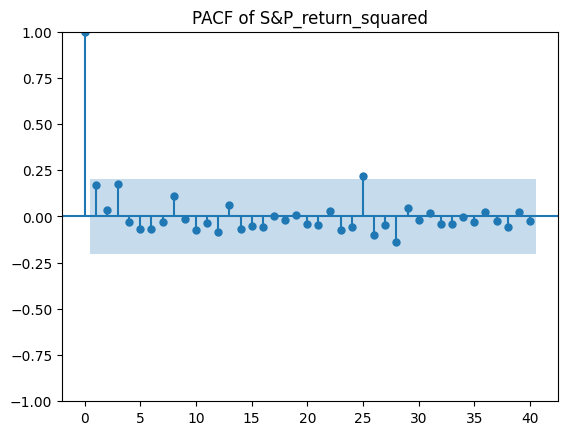


ADF Test Results:
ADF Statistic: -7.982578649437496
p-value: 2.5995432009365416e-12
Critical Values:
   1%: -3.503514579651927
   5%: -2.893507960466837
   10%: -2.583823615311909


In [16]:
# ACF and PACF plots for stock prices
stock_price_column = ['S&P500_Adj_Close', 'S&P500_Close','S&P_return','S&P_return_squared']
for stock_price in stock_price_column:
    plt.figure(figsize=(14, 6))
    plot_acf(data[stock_price].dropna(), lags=40)
    plt.title('ACF of ' + stock_price)
    plt.show()

    plt.figure(figsize=(14, 6))
    plot_pacf(data[stock_price].dropna(), lags=40)
    plt.title('PACF of ' + stock_price)
    plt.show()

    # Check stationarity using ADF test
    adf_result = adfuller(data[stock_price].dropna())
    print("\nADF Test Results:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")